## IV. Methodology

### 4.1 Dataset Preparation
* Load the clean EEG, EOG, and EMG data from the EEGDenoiseNet dataset in .npy format.
* Randomly select a clean EEG segment (2-second duration) from the dataset.
* Randomly select an EOG or EMG artifact segment from the respective dataset.
### 4.2 SNR Generation
* Determine the desired range of SNR values to evaluate for both ocular and myogenic artifacts. For example, consider the ranges mentioned in the paper: ocular artifacts (-7 to 2 dB) and myogenic artifacts (-7 to 4 dB).
* Randomly select an SNR value from the respective range for each contaminated signal.
### 4.3 Contaminated Signal Generation
For each selected clean EEG segment:
* Randomly select an artifact type (EOG or EMG).
* Randomly select an artifact segment from the chosen type.
* Calculate the contaminated signal using the formula: contaminated_signal = clean_eeg + λ * artifact_segment.
* Adjust the value of λ based on the randomly selected SNR value.
### 4.4 Denoising Methods
#### 4.4.1 Independent Component Analysis
* Apply ICA to the contaminated EEG signal to extract independent components.
* Identify the components representing the EEG signal.
* Reconstruct the denoised EEG signal using the selected components.
* Measure the processing time and SNR of the denoised signal.
#### 4.4.2 Empirical Mode Decomposition
* Apply EMD to the contaminated EEG signal to decompose it into intrinsic mode functions (IMFs).
* Analyze the IMFs to identify and remove artifacts or noise components.
* Reconstruct the denoised EEG signal using the remaining IMFs.
* Measure the processing time and SNR of the denoised signal.
### 4.5 Evaluation
* Calculate the SNR of the denoised EEG signals using appropriate metrics such as the ratio of signal power to noise power.
* Compare the SNR performance and processing time of ICA and EMD for denoising the EEG signals.
* Analyze the results and draw conclusions regarding the denoising effectiveness and efficiency of each method.

### 4.1 Dataset Preparation

In [2]:
import numpy as np
eeg = np.load('EEGDenoiseNet/EEG_all_epochs.npy')
print(f"------EEG-----\nSize: {eeg.size}\nRow count: {len(eeg)}\nColumn count: {len(eeg[0])}\nFirst Column: {eeg[:, 0]}\n\n")

emg = np.load('EEGDenoiseNet/EMG_all_epochs.npy')
print(f"------EMG(Heart)-----\nSize: {emg.size}\nRow count: {len(emg)}\nColumn count: {len(emg[0])}\nFirst Column: {emg[:, 0]}\n\n")

eog = np.load('EEGDenoiseNet/EOG_all_epochs.npy')
print(f"------EOG(Ocular)-----\nSize: {eog.size}\nRow count: {len(eog)}\nColumn count: {len(eog[0])}\nFirst Column: {eog[:, 0]}")

------EEG-----
Size: 2311168
Row count: 4514
Column count: 512
First Column: [184.5070843  171.96198926 229.56731921 ... 317.59704985 262.89154388
 216.07429779]


------EMG(Heart)-----
Size: 2866176
Row count: 5598
Column count: 512
First Column: [20245.96672667 23595.64263225 34991.76745427 ...  1490.61150022
   -38.705385    1260.54203952]


------EOG(Ocular)-----
Size: 1740800
Row count: 3400
Column count: 512
First Column: [  7.30828446  -1.68701752  12.4808031  ...   6.81209745 298.19922839
 -44.54226777]


In [3]:
import matplotlib.pyplot as plt

def plot_random_row(dataset, title:str):
    num_rows, num_columns = dataset.shape
    sampling_rate = 256  # Hz
    duration = 2  # seconds
    time = np.arange(0, duration, 1/sampling_rate)

    #----PLOT RANDOM ROW AS SAMPLE-----
    random_row_index = np.random.randint(num_rows) #produce random index or number
    random_row = dataset[random_row_index] #extract row of that corresponding index
    plt.plot(time, random_row)
    plt.title(f'{title} Dataset Row #{random_row_index} (random)')
    return plt.show()

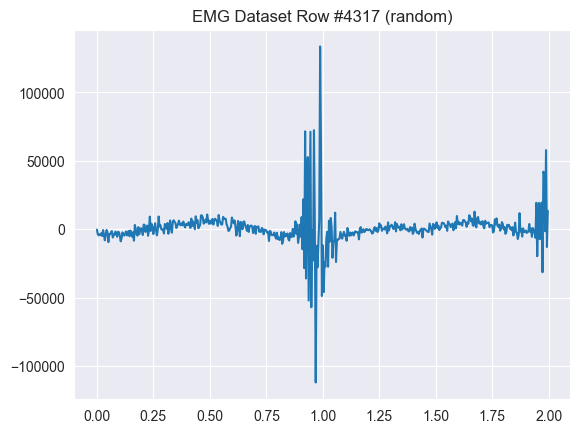

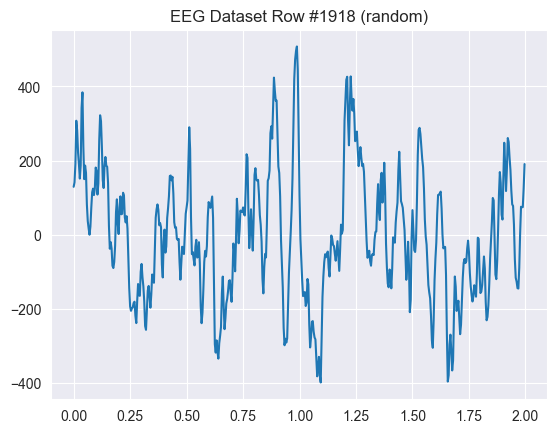

In [4]:
plot_random_row(emg,'EMG')
plot_random_row(eeg,'EEG')

### 4.2 SNR Generation

* Randomly select an SNR value from the respective range for each contaminated signal.

Ocular artifacts: [-7 to 2]
Mygoenic artifact: [-7 to 4]

What I did for this part is every time I create a contaminated EEG signal, a random SNR value is chosen. I did not pick specific SNR values anymore as increasing or decreasing SNR value doesn't necessarily mean it's more complex.

### 4.3 Contaminated Signal Generation

In [5]:
print(len(eeg[1]))
print(eeg[1][0])

512
171.96198926000247


In [6]:
# # #RMS
# # #g is 1 sample of EEG data. n is the 512 columns
# def rms(eeg_index):
#     #n = number of samples
#     #summation of g^2
#     sum=0
#     for i in range(512):
#         sum+=(eeg[eeg_index][i])**2
#     return ((1/512)*sum)**0.5
#
#
# # #SNR
# # import math
# # def snr()
# #     z = rms()
# #     math.log10(z)

**WHAT'S WRONG?**

* Delta should be used in the code instead of SNR.
* Delta should be adjusted based on the SNR value you want
* It should be: ```contaminated_eeg_sample = clean_eeg_sample + delta*eog_artifact```

ADD CODE TO DETERMINE THE DELTA BASED ON THE RANDOMLY GENERATED SNR VALUE.

$$\text{SNR} = 10log\frac{RMS(x)}{RMS(\lambda\times n)}$$


$$\frac{SNR}{10} = log\frac{RMS(x)}{RMS(\lambda\times n)}$$

$$SNR=10\log\frac{\text{RMS(signal)}}{RMS(noise)}$$

In [7]:
# ## ATTEMPT 2 OF FUNCTION GENERATE_CONTAMINATED_EEG_DATA | WITH CONTAMINATION INDICES
#
# def generate_contaminated_eeg_data(clean_eeg_data, artifacts, num_samples, artifact_type:str):
#     num_clean_eeg_samples = clean_eeg_data.shape[0]
#     num_artifacts = artifacts.shape[0]
#
#     contaminated_eeg_data = []
#     contamination_indices = []
#     snr_values = []
#     if artifact_type=='eog':
#         max_snr = 2+1
#     elif artifact_type=='emg':
#         max_snr=4+1
#
#     for _ in range(num_samples):
#         snr = np.random.randint(-7, max_snr)
#         clean_eeg_index = np.random.randint(0, num_clean_eeg_samples)
#         artifact_index = np.random.randint(0, num_artifacts)
#
#         clean_eeg_sample = clean_eeg_data[clean_eeg_index]
#         eog_artifact = artifacts[artifact_index]
#         contaminated_eeg_sample = clean_eeg_sample + snr*eog_artifact
#
#         contaminated_eeg_data.append(contaminated_eeg_sample)
#         contamination_indices.append((clean_eeg_index, artifact_index))
#         snr_values.append(snr)
#
#     return np.array(contaminated_eeg_data), contamination_indices,snr_values

In [8]:
num_samples = 1000  # Specify the number of contaminated EEG data samples to generate
contaminated_eeg_data, contamination_indices,snr_values = generate_contaminated_eeg_data(eeg, eog, num_samples,artifact_type='eog')

# Verify the shape of the generated contaminated EEG data
print("Shape of contaminated EEG data:", contaminated_eeg_data.shape)

NameError: name 'calculate_snr' is not defined

In [ ]:
# Print the indices of the clean EEG data and EOG artifacts used for each contaminated signal
#for i, (eeg_index, eog_index) in enumerate(contamination_indices):
#    print(f"Contaminated EEG sample {i+1}: Clean EEG index = {eeg_index}, EOG index = {eog_index}")
#print(contamination_indices)

sampling_rate = 256  # Hz
duration = 2  # seconds
time = np.arange(0, duration, 1/sampling_rate)

plt.figure(figsize=(10, 6))
row=0

# Plot clean EEG
plt.subplot(2, 2, 1)
plt.plot(time, eeg[contamination_indices[row][0]])  # Replace '0' with the desired segment or row from the clean EEG data
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Clean EEG (row: {contamination_indices[row][0]})')

# Plot EOG
plt.subplot(2, 2, 2)
plt.plot(time, eog[contamination_indices[row][1]])  # Replace '0' with the desired segment or row from the EOG data
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'EOG (row: {contamination_indices[row][1]})')

# Plot contaminated signal
plt.subplot(2, 1, 2)
plt.plot(time, contaminated_eeg_data[row])  # Replace '0' with the desired segment or row from the contaminated signal
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Contaminated Signal | $snr={snr_values[row]}$')

plt.tight_layout()
plt.show()

In [67]:
def calculate_snr(clean_eeg, artifact_segment,λ):
    N = 512
    # Calculate the signal power (clean EEG)
    signal_power = (np.sum(clean_eeg ** 2)*(1/N))**0.5
    # Calculate the noise power (artifact segment)
    noise_power = (np.sum((λ*artifact_segment)**2)*(1/N))**0.5
    # Calculate the SNR in dB (RMS FORMULA)
    snr_db = 10 * np.log10(signal_power / noise_power)
    return round(snr_db,2)

def generate_contaminated_signal(clean_eeg_data,artifact_data,num_samples:int, artifact_type:str):
    num_clean_eeg_samples = clean_eeg_data.shape[0]
    num_eog_artifacts = artifact_data.shape[0]

    contaminated_eeg_data = []
    contamination_indices = []
    snr_values=[]

    for i in range(num_samples):
        clean_eeg_index = np.random.randint(0, num_clean_eeg_samples)
        eog_artifact_index = np.random.randint(0, num_eog_artifacts)

        clean_eeg_sample = clean_eeg_data[clean_eeg_index]
        artifact = artifact_data[eog_artifact_index]

        #GENERATE RANDOM LAMBDA VALUE HERE
        λ = random.uniform(-1,1)
        print(λ)

        #GENERATE CONTAMINATED SIGNAL USING FORMULA: y=x+(λ*n)
        contaminated_eeg_sample = clean_eeg_sample + (artifact*λ)

        contaminated_eeg_data.append(contaminated_eeg_sample)
        contamination_indices.append((clean_eeg_index, eog_artifact_index))
        snr_values.append(calculate_snr(clean_eeg_data,artifact,λ))
    return np.array(contaminated_eeg_data), contamination_indices, snr_values, artifact_type

def get_random_rows(dataset, num_rows):
    num_total_rows = dataset.shape[0]
    selected_indices = np.random.choice(num_total_rows, size=num_rows, replace=False)
    selected_rows = dataset[selected_indices, :]
    return selected_rows

#----------------
clean_eeg_data = get_random_rows(eeg,1000)
artifact_data = get_random_rows(eog,1000)
λ = 0.3
for i in [0.1,0.2,0.3,0.4]:
    λ=i
    contaminated_eeg_data = clean_eeg_data + λ * artifact_data
    # Calculate SNR for each contaminated EEG sample
    snr_values = calculate_snr(contaminated_eeg_data, clean_eeg_data, artifact_data)

    # Verify the shape of the SNR values array
    print(f"\n\n-----| {λ} |-----")
    print("Shape of SNR values:", snr_values.shape)
    # Example: print SNR values for the first 10 contaminated EEG samples
    print(f"SNR values for the first 10 samples: {round(snr_values[0]),round(snr_values[1]),round(snr_values[2]),round(snr_values[3]),round(snr_values[4]),round(snr_values[5]),round(snr_values[6]),round(snr_values[7]),round(snr_values[8]),round(snr_values[9])}")
    print(f"Max SNR: {round(max(snr_values))}\nMin SNR: {round(min(snr_values))}\nAverage SNR: {round(np.mean(snr_values))}")



-----| 0.1 |-----
Shape of SNR values: ()


IndexError: invalid index to scalar variable.

Ocular artifacts: [-7 to 2] Mygoenic artifact: [-7 to 4]



| λ   | Max | Min | AVG | SNR values of first 10 samples           |
|-----|-----|-----|-----|------------------------------------------|
| 0.1 | 42  | 9   | 26  | (25, 33, 26, 38, 28, 31, 37, 35, 23, 26) |
| 0.2 | 37  | 1   | 20  | (27, 16, 23, 20, 17, 14, 20, 22, 12, 24) |
| 0.3 | 32  | -1  | 17  | (16, 24, 17, 28, 18, 22, 28, 26, 14, 17)                                         |
| 0.4 | 31  | -9  | 14  | (18, 16, 2, 10, 17, 3, 22, 13, 9, 7)     |
| 0.5 | 30  | -7  | 12  | (9, 18, 6, 8, 15, 9, 6, 10, 11, 11)      |
| 0.6 | 26  | -7  | 11  | (10, 18, 11, 22, 12, 16, 22, 20, 8, 11)                                         |
| 0.7 | 25  | -8  | 9   | (8, 16, 9, 21, 11, 14, 20, 18, 6, 9)                                         |
| 0.8 | 24  | -9  | 8   | (7, 15, 8, 20, 10, 13, 19, 17, 5, 8)                                         |
| 0.9 | 23  | -10 | 7   | (6, 14, 7, 19, 9, 12, 18, 16, 4, 7)                                         |
| 1   | 22  | -11 | 6   | (5, 13, 6, 18, 8, 11, 17, 15, 3, 6)                                         |
| 1.1 | 23  | -13 | 5   | (1, 4, -2, 3, -1, 23, -3, 2, 9, 3)                                         |
| 1.2 | 22  | -13 | 4   | (1, 3, -3, 2, -1, 22, -4, 1, 8, 2)                                         |
| 1.3 | 22  | -14 | 4   | (0, 2, -3, 1, -2, 22, -4, 0, 7, 1)                                         |
| 1.4 | 21  | -15 | 3   | (-1, 2, -4, 1, -3, 21, -5, 0, 7, 1)                                         |
| 1.5 | 21  | -15 | 2   | (-1, 1, -5, 0, -3, 21, -6, -1, 6, 0)                                         |
| 1.6 | 20  | -16 | 2   | (-2, 1, -5, 0, -4, 20, -6, -2, 6, 0)                                         |
| 1.7 | 19  | -16 | 1   | (-2, 0, -6, -1, -4, 19, -7, -2, 5, -1)                                         |
| 1.8 | 19  | -17 | 1   | (-3, -1, -6, -1, -5, 19, -7, -3, 5, -1)                                         |
| 1.9 | 18  | -17 | 0   | (-3, -1, -7, -2, -5, 18, -8, -3, 4, -2)                                         |
| 2.0 | 18  | -18 | 0   | (-4, -1, -7, -2, -6, 18, -8, -3, 4, -2)                                         |


**TASKS** - July 27, 2023

* ~Function that calculates RMS and SNR of an array of signals~

* ~Function that generates contaminated signal~
    * ~Parameters~:
        * ~clean eeg dataset~
        * ~artifact segment dataset~
        * ~string: 'ocular' or 'myogenic'~
        * ~sample size (number of contaminated signals to be generated)~
    * ~Functionalities:~
        * ~Randomly generate decimal lambda values ranging from 0 to 1.6~
        * ~Creates contaminated signal from clean eeg and artifact using the formula given.~
        * ~Calculate the snr of that given signal using the SNR function.~
    * ~Returns:~
        * ~NP array(nx512): contaminated_eeg_data~
        * ~List: contamination_indices (clean_eeg_index, artifact_index)~
        * ~List: snr_values~
        * ~string: artifact_type~

* ~The output of the functions above shall be assigned to variables: contaminated, indices, snr_values~
* ~Print out the shape of the dataset.~
* ~CODE that filters generated contaminated signals (whether they fall within the accepted range of SNR values for that artifact type)~
    * ~Variables:~
        *  ~contaminated, indices, snr_values, artifact_type~
    * ~Functionalities:~
        * ~if artifact_type=='ocular', snr_range=[-7,2+1]; elif artifact_type=='myogenic', snr_range=[-7,4+1]~
        * ~Go through contaminated2 & snr_values2 and see if that row has a snr value that satisfies the given snr_range~
            * ~If false: delete row using the index~

* ~Then create new variables, contaminated2, indices2, and snr_values2.~

In [11]:
import random
import numpy as np

def get_random_rows(dataset, num_rows):
    num_total_rows = dataset.shape[0]
    selected_indices = np.random.choice(num_total_rows, size=num_rows, replace=False)
    selected_rows = dataset[selected_indices, :]
    return selected_rows

#CALCULATES SNR INDIVIDUALLY; GOOD FOR THE SIGNAL GENERATION FUNCTION


In [112]:
import random
import numpy as np

def calculate_snr(clean_eeg, artifact_segment,λ):
    N = 512
    # Calculate the signal power (clean EEG)
    signal_power = (np.sum(clean_eeg ** 2)*(1/N))**0.5
    # Calculate the noise power (artifact segment)
    noise_power = (np.sum((λ*artifact_segment)**2)*(1/N))**0.5
    # Calculate the SNR in dB (RMS FORMULA)
    snr_db = 10 * np.log10(signal_power / noise_power)
    return round(snr_db,2)

def generate_contaminated_signal(clean_eeg_data,artifact_data,num_samples:int, artifact_type:str):
    num_clean_eeg_samples = clean_eeg_data.shape[0]
    num_eog_artifacts = artifact_data.shape[0]

    contaminated_eeg_data = []
    contamination_indices = []
    snr_values=[]

    for i in range(num_samples):
        clean_eeg_index = np.random.randint(0, num_clean_eeg_samples)
        eog_artifact_index = np.random.randint(0, num_eog_artifacts)

        clean_eeg_sample = clean_eeg_data[clean_eeg_index]
        artifact = artifact_data[eog_artifact_index]

        #GENERATE RANDOM LAMBDA VALUE HERE
        λ = random.uniform(-40,40)
        #GENERATE CONTAMINATED SIGNAL USING FORMULA: y=x+(λ*n)
        contaminated_eeg_sample = clean_eeg_sample + (artifact*λ)
        snr=calculate_snr(clean_eeg_data,artifact,λ)

        contaminated_eeg_data.append(contaminated_eeg_sample)
        contamination_indices.append((clean_eeg_index, eog_artifact_index))
        snr_values.append(snr)
    return np.array(contaminated_eeg_data), contamination_indices, snr_values, artifact_type

In [129]:
contaminated_eeg_data,indices,snr_values,artifact_type = generate_contaminated_signal(eeg,eog,100000,'ocular')
print(f"{contaminated_eeg_data}\nSNR Values: {snr_values}\nArtifact Type: {artifact_type}")

[[ -182.25402679  -113.66807327  -142.34230332 ...   323.17128826
    246.53067755   465.00744447]
 [-1262.01847996 -1717.43801746 -1381.67978469 ...  -650.4740459
   -739.13340508  -932.52753226]
 [  319.31938982   375.12562586   245.39010789 ...  -997.34958246
   -861.99396249  -857.8448583 ]
 ...
 [   63.52395076   278.54054777   316.83081905 ...   -73.29623934
    -49.71704933  -136.78073114]
 [  850.0060009   1039.67453518   835.03219326 ...  1124.4987683
   1172.88413166  1248.13162718]
 [  148.41039955   303.89891897   363.04465295 ...   308.12739611
    362.3895959    420.68007184]]
SNR Values: [13.69, 6.69, 13.48, 14.97, 21.35, 5.06, 7.72, 9.14, 5.23, 18.57, 8.95, 12.73, 13.87, 3.04, 9.12, 8.74, 11.75, 12.28, 12.34, 7.91, 6.39, 1.9, 10.26, 13.33, 9.74, 14.12, 13.8, 9.31, 7.57, 28.72, 12.62, 7.61, 9.22, 5.43, 2.06, 7.36, 20.22, 9.89, 8.82, 12.4, 13.26, 9.66, 7.98, 7.18, 9.41, 6.26, 5.08, 6.65, 8.49, 14.43, 4.16, 11.41, 14.88, 6.18, 6.43, 6.24, 2.71, 8.8, 16.71, 10.9, 4.28, 18.0

In [130]:
count=0
contaminated_data2,indices2,snr_values2 = [],[],[]
if artifact_type =='ocular':
    snr_range = [-7,2]
elif artifact_type == 'myogenic':
    snr_range = [-7,4]

for i in snr_values:
    if i>=snr_range[0] and i<=snr_range[1]:
        index=snr_values.index(i)
        count+=1
        contaminated_data2.append(contaminated_eeg_data[index])
        indices2.append(indices[index])
        snr_values2.append(snr_values[index])

print(count)

2179


In [137]:
from PyEMD import EMD

contaminated_data2=np.array(contaminated_data2)
# Create an instance of the EMD class
emd = EMD()

# Decompose the contaminated EEG data using Empirical Mode Decomposition
# `emd.sift()` returns a list of IMFs (Intrinsic Mode Functions) and a residue
imfs, residue = emd.sift(contaminated_data2, max_imf=512)

# Combine the IMFs to reconstruct the denoised EEG data
denoised_eeg_data = np.sum(imfs, axis=0)

# Now you have the denoised EEG data in 'denoised_eeg_data'

AttributeError: 'EMD' object has no attribute 'sift'